##### The Lending_Club_Case_Study

Here the objective is to help the company with 2 objectives:-

1) If the loan is approved still the customer may default which is a possible scenario then the bank is at a loss completely.

2) Loan might have been rejected based on some criteria mismatch but the customer was like to repay the loan in this case the bank will also loose revenue and also possible loss to the borrowser who might go to some other channel for the loan.

Hence a proper analytical solution or tools is needed to overcome thes situations.


Note :- Since the jupyter notebook was too slow to process hence I have split parts of the over analysis in to other ipynb files and the files are renamed as per the actions/analysis shown there. Outlier check and treat has a different file. Null values replacement or with the best imputation methods has a different ipynb file.

In [1]:
# Lets first check the data depedncies and the explanation of each metrics
# making an investigation slowly we would need to decide as which of the features would be not relevant which we would need 
# to delete from the available dataset

import pandas as pd
data = pd.read_excel("./dataset/Data_Dictionary.xlsx")
data

LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...
115                    NaN                                                NaN
116                    NaN  * Employer Title replaces Employer Name for al...

[117 rows x 2 columns]

In [2]:
#reading the main dataset available to do an indepth analysis
import pandas as pd

df = pd.read_csv("./dataset/Loan.csv")
df.head()

C:\Users\susha\AppData\Local\Temp\ipykernel_4540\3072790982.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./dataset/Loan.csv")


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

https://www.lendingclub.com/foliofn/rateDetail.action

From the above link we get a general understanding as to how different kind of loans are graded. Here we check the category, sub category then we finally have a base rate and adjustment rate with rehgards to any volatilyt based on which finally there are different grades asociated to it.

In [3]:
#listing out the no of columns in the dataset
for x in df.columns:
    print(x)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

Some of the columns we need to remove since that is not relevant to keep in order to predict the overall objective.

delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type

In [4]:
df.drop(columns = ["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt",\
    "total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt",\
        "last_credit_pull_d","application_type"], inplace = True)
df


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
39712   36 months    8.07%        78.42     A        A4  ...   
39713   36 months   10.28%       275.38     C        C1  ...   
39714   36 months    8.07%       156.84     A        A4  ...   
39715   36 months    7.43%       155.38     A        A2  ...   
39716   36 months   13.75%       255.43     E        E2  ...   

      num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                    NaN                NaN            NaN               NaN   
1                    NaN                NaN            NaN               NaN   
2                    NaN                NaN            NaN               NaN   
3                    NaN                NaN            NaN               NaN   
4                    NaN                NaN            NaN               NaN   
...                  ...                ...            ...               ...   
39712                NaN                NaN            NaN               NaN   
39713                NaN                NaN            NaN               NaN   
39714                NaN                NaN            NaN               NaN   
39715                NaN                NaN            NaN               NaN   
39716                NaN                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                      0.0       0.0             NaN               NaN   
1                      0.0       0.0             NaN               NaN   
2                      0.0       0.0             NaN               NaN   
3                      0.0       0.0             NaN               NaN   
4                      0.0       0.0             NaN               NaN   
...                    ...       ...             ...               ...   
39712                  NaN       NaN             NaN               NaN   
39713                  NaN       NaN             NaN               NaN   
39714                  NaN       NaN             NaN               NaN   
39715                  NaN       NaN             NaN               NaN   
39716                  NaN       NaN             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
0                NaN                        NaN  
1                NaN                        NaN  
2                NaN                        NaN  
3                NaN                        NaN  
4                NaN                        NaN  
...              ...                        ...  
39712            NaN                        NaN  
39713            NaN                        NaN  
39714            NaN                        NaN  
39715            NaN                        NaN  
39

selecting only the dataset which helpful that is we need to select only the people who have fully paid and who are charged off,
 since people who are applying the loan there is no insight which can be generated from that. Fully paid applicant are likely to pay the loan so we have selected that category which is useful.

In [5]:

df = df[df['loan_status']!='Current']
df['loan_status'].value_counts()
df.to_csv("updated.csv", header=True, index=False)

Going through a automated EDA library to have have a basic indepth understanding of the overall available data.

In [6]:
import pandas_profiling as pp
profile = pp.ProfileReport(df)
# profile.to_file("output.html")

C:\Users\susha\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\susha\AppData\Local\Temp\ipykernel_4540\69275518.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [7]:
df.shape

(38577, 90)

In [8]:
pd.get_option("display.max_columns",None)
pd.set_option('display.max_rows', None)

In [9]:
#checking null values count column wise
df.isnull().sum()


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2386
emp_length                         1033
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12527
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [10]:
df_missing = df.isna()
df_num_missing = df_missing.sum()
df_num_missing/len(df)

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.061850
emp_length                        0.026778
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
issue_d                           0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
url                               0.000000
desc                              0.324727
purpose                           0.000000
title                             0.000285
zip_code                          0.000000
addr_state 

In [11]:
df_num_missing/len(df) >0.60


id                                False
member_id                         False
loan_amnt                         False
funded_amnt                       False
funded_amnt_inv                   False
term                              False
int_rate                          False
installment                       False
grade                             False
sub_grade                         False
emp_title                         False
emp_length                        False
home_ownership                    False
annual_inc                        False
verification_status               False
issue_d                           False
loan_status                       False
pymnt_plan                        False
url                               False
desc                              False
purpose                           False
title                             False
zip_code                          False
addr_state                        False
dti                               False


Dropping the columns which have more than 40% null values since they are not  not contributing to our analysis.

In [12]:
df.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog','annual_inc_joint',\
                 'dti_joint','verification_status_joint','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m',\
                 'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',\
                 'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',\
                 'bc_util','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc',\
                 'mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq',\
                 'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl',\
                 'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',\
                 'num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit',\
                 'total_il_high_credit_limit'], inplace = True)

C:\Users\susha\AppData\Local\Temp\ipykernel_4540\3374332901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog','annual_inc_joint',\


In [13]:
df.drop(columns=['mo_sin_old_il_acct','tot_coll_amt'], inplace =True)

C:\Users\susha\AppData\Local\Temp\ipykernel_4540\105343765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['mo_sin_old_il_acct','tot_coll_amt'], inplace =True)


In [14]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
initial_list_status               0
collections_12_mths_ex_med       56
policy_code                 

Columns = ['emp_title','emp_length','desc','title','collections_12_mths_ex_med','chargeoff_within_12_mths','pub_rec_bankruptcies',\'tax_liens']

Above columns still have null values which will be actioned in a different ipynb file since this will require iterations to 
check which imputation method will good to go ahead with. saved the current file with temp.csv name


In [15]:
df.to_csv("temp.csv",header=True, index=False)

In [16]:
df.shape

(38577, 33)

In [17]:
# we have 15 columns numeric features
df.select_dtypes(include='number').shape

(38577, 15)

In [18]:
df.select_dtypes(include='number').columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'collections_12_mths_ex_med',
       'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [19]:
# we have 0 datatime type features
df.select_dtypes(include='datetime').shape

(38577, 0)

In [20]:
# we have 18 non numeric type features
df.select_dtypes(exclude='number').shape

(38577, 18)

In [21]:
df.select_dtypes(exclude='number').columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'initial_list_status'],
      dtype='object')

#### Checking the ratio of the defaulters to non-defaulters

In [22]:
# df['loan_amnt'].value_counts().plot.bar()
import seaborn as sns
loan_status = df['loan_status'].value_counts()   
loan_status

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

Index(['Fully Paid', 'Charged Off'], dtype='object')
[32950  5627]


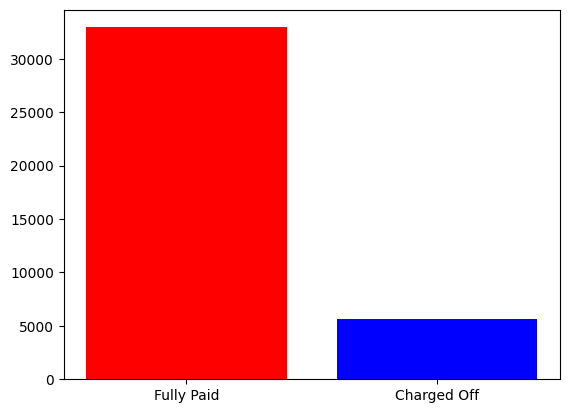

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
print(loan_status.index)
print(loan_status.values)
plt.bar(x=loan_status.index, height=loan_status.values,color=['red','blue'])
plt.show()

From the above diagram we see that the ratio of fully paid customer is huge in numbers hence we conclude that the dataset is not balanced. Also we understand Loan _status if the target column to be predicted.

Also we are converting the fully paid values to as 1 and Charged off to as 0 in the loan_status column.

In [24]:
#Creating data frame for the defaulters and non defaulters separately to investigate into the reasons


df['loan_status'].replace(['Charged Off', 'Fully Paid'],
                        [0, 1], inplace=True)

fully_paid = df[df['loan_status']==1]
charged_off = df[df['loan_status']==0]

C:\Users\susha\AppData\Local\Temp\ipykernel_4540\2445962514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'].replace(['Charged Off', 'Fully Paid'],


In [25]:
import numpy as np
df['confidence'] = np.where(df['loan_amnt']==df['funded_amnt_inv'], 'yes','no')      
print(df.head(10))


         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077501    1296599       5000         5000           4975.0   36 months   
1   1077430    1314167       2500         2500           2500.0   60 months   
2   1077175    1313524       2400         2400           2400.0   36 months   
3   1076863    1277178      10000        10000          10000.0   36 months   
5   1075269    1311441       5000         5000           5000.0   36 months   
6   1069639    1304742       7000         7000           7000.0   60 months   
7   1072053    1288686       3000         3000           3000.0   36 months   
8   1071795    1306957       5600         5600           5600.0   60 months   
9   1071570    1306721       5375         5375           5350.0   60 months   
10  1070078    1305201       6500         6500           6500.0   60 months   

   int_rate  installment grade sub_grade  ...    dti initial_list_status  \
0    10.65%       162.87     B        B2  ...  27.65  

C:\Users\susha\AppData\Local\Temp\ipykernel_4540\959396383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['confidence'] = np.where(df['loan_amnt']==df['funded_amnt_inv'], 'yes','no')


##### Univariate amd Bivariate Analysis

In [26]:
df.shape

(38577, 34)

Removing all the nan values from rows

In [27]:
df.dropna(inplace=True)

C:\Users\susha\AppData\Local\Temp\ipykernel_4540\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [28]:
df.shape

(23798, 34)

In [36]:
df.to_csv("outliers.csv",header=True, index=False)

##### Understanding pending features of the dataset:-

1) member_id :- Id for the borrower member

2) loan_amnt :- The amount of the loan applied for by the borrower

3) funded_amnt :- Total amount committed to that loan 

4) funded_amnt_inv :- amount committed by investors 

5) term :- number of payments on the loan whicn cvary between 36 to 60 months

6) int_rate :- Interest Rate on the loan

7) installment :- monthly payments for the loan taken

8) grade :- Grades are assigned from A to G depending on how risky the loan is under a category.

9) sub_grade :- After grades Sub Grades are assigned from 1 to 5 depending on risk category.

10) emp_title :- Job title assigned by the borrower

11) emp_length :- Employment of the borrowser in year

12) home_ownership :- Home ownership status of the borrower

13) annual_inc :- Annual income of the borrower

14) verification_status :- States if the income of the borrower was verified or not

15) issue_d :- loan issues month

16) loan_status :- Status of loan(defaulted or non defaulted)

17) pymnt_plan :- Payment plan for the loan taken

18) desc :- Loan description

19) purpose :- purpose of the oan taken by borrower

20) zip_code :- zip code of the borower

21) addr_state :- address of the borrower

22) dti :- ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


array([[<AxesSubplot: title={'center': 'loan_amnt'}>]], dtype=object)

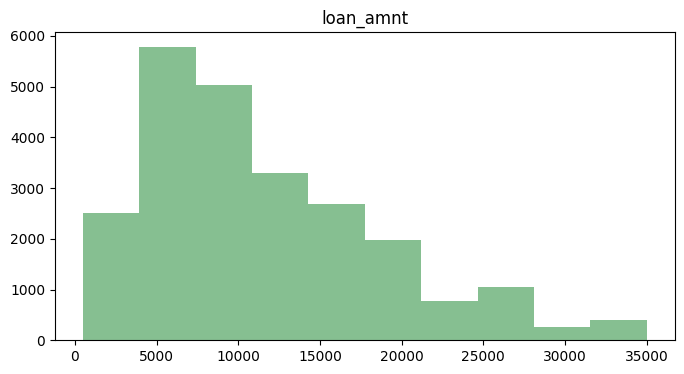

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

df.hist(column ='loan_amnt',bins =10, grid=False,figsize=(8,4), color='#86bf91')

From the above char we are able to conclude from the dataset available that highest number of loans were within the range of 5000-7500

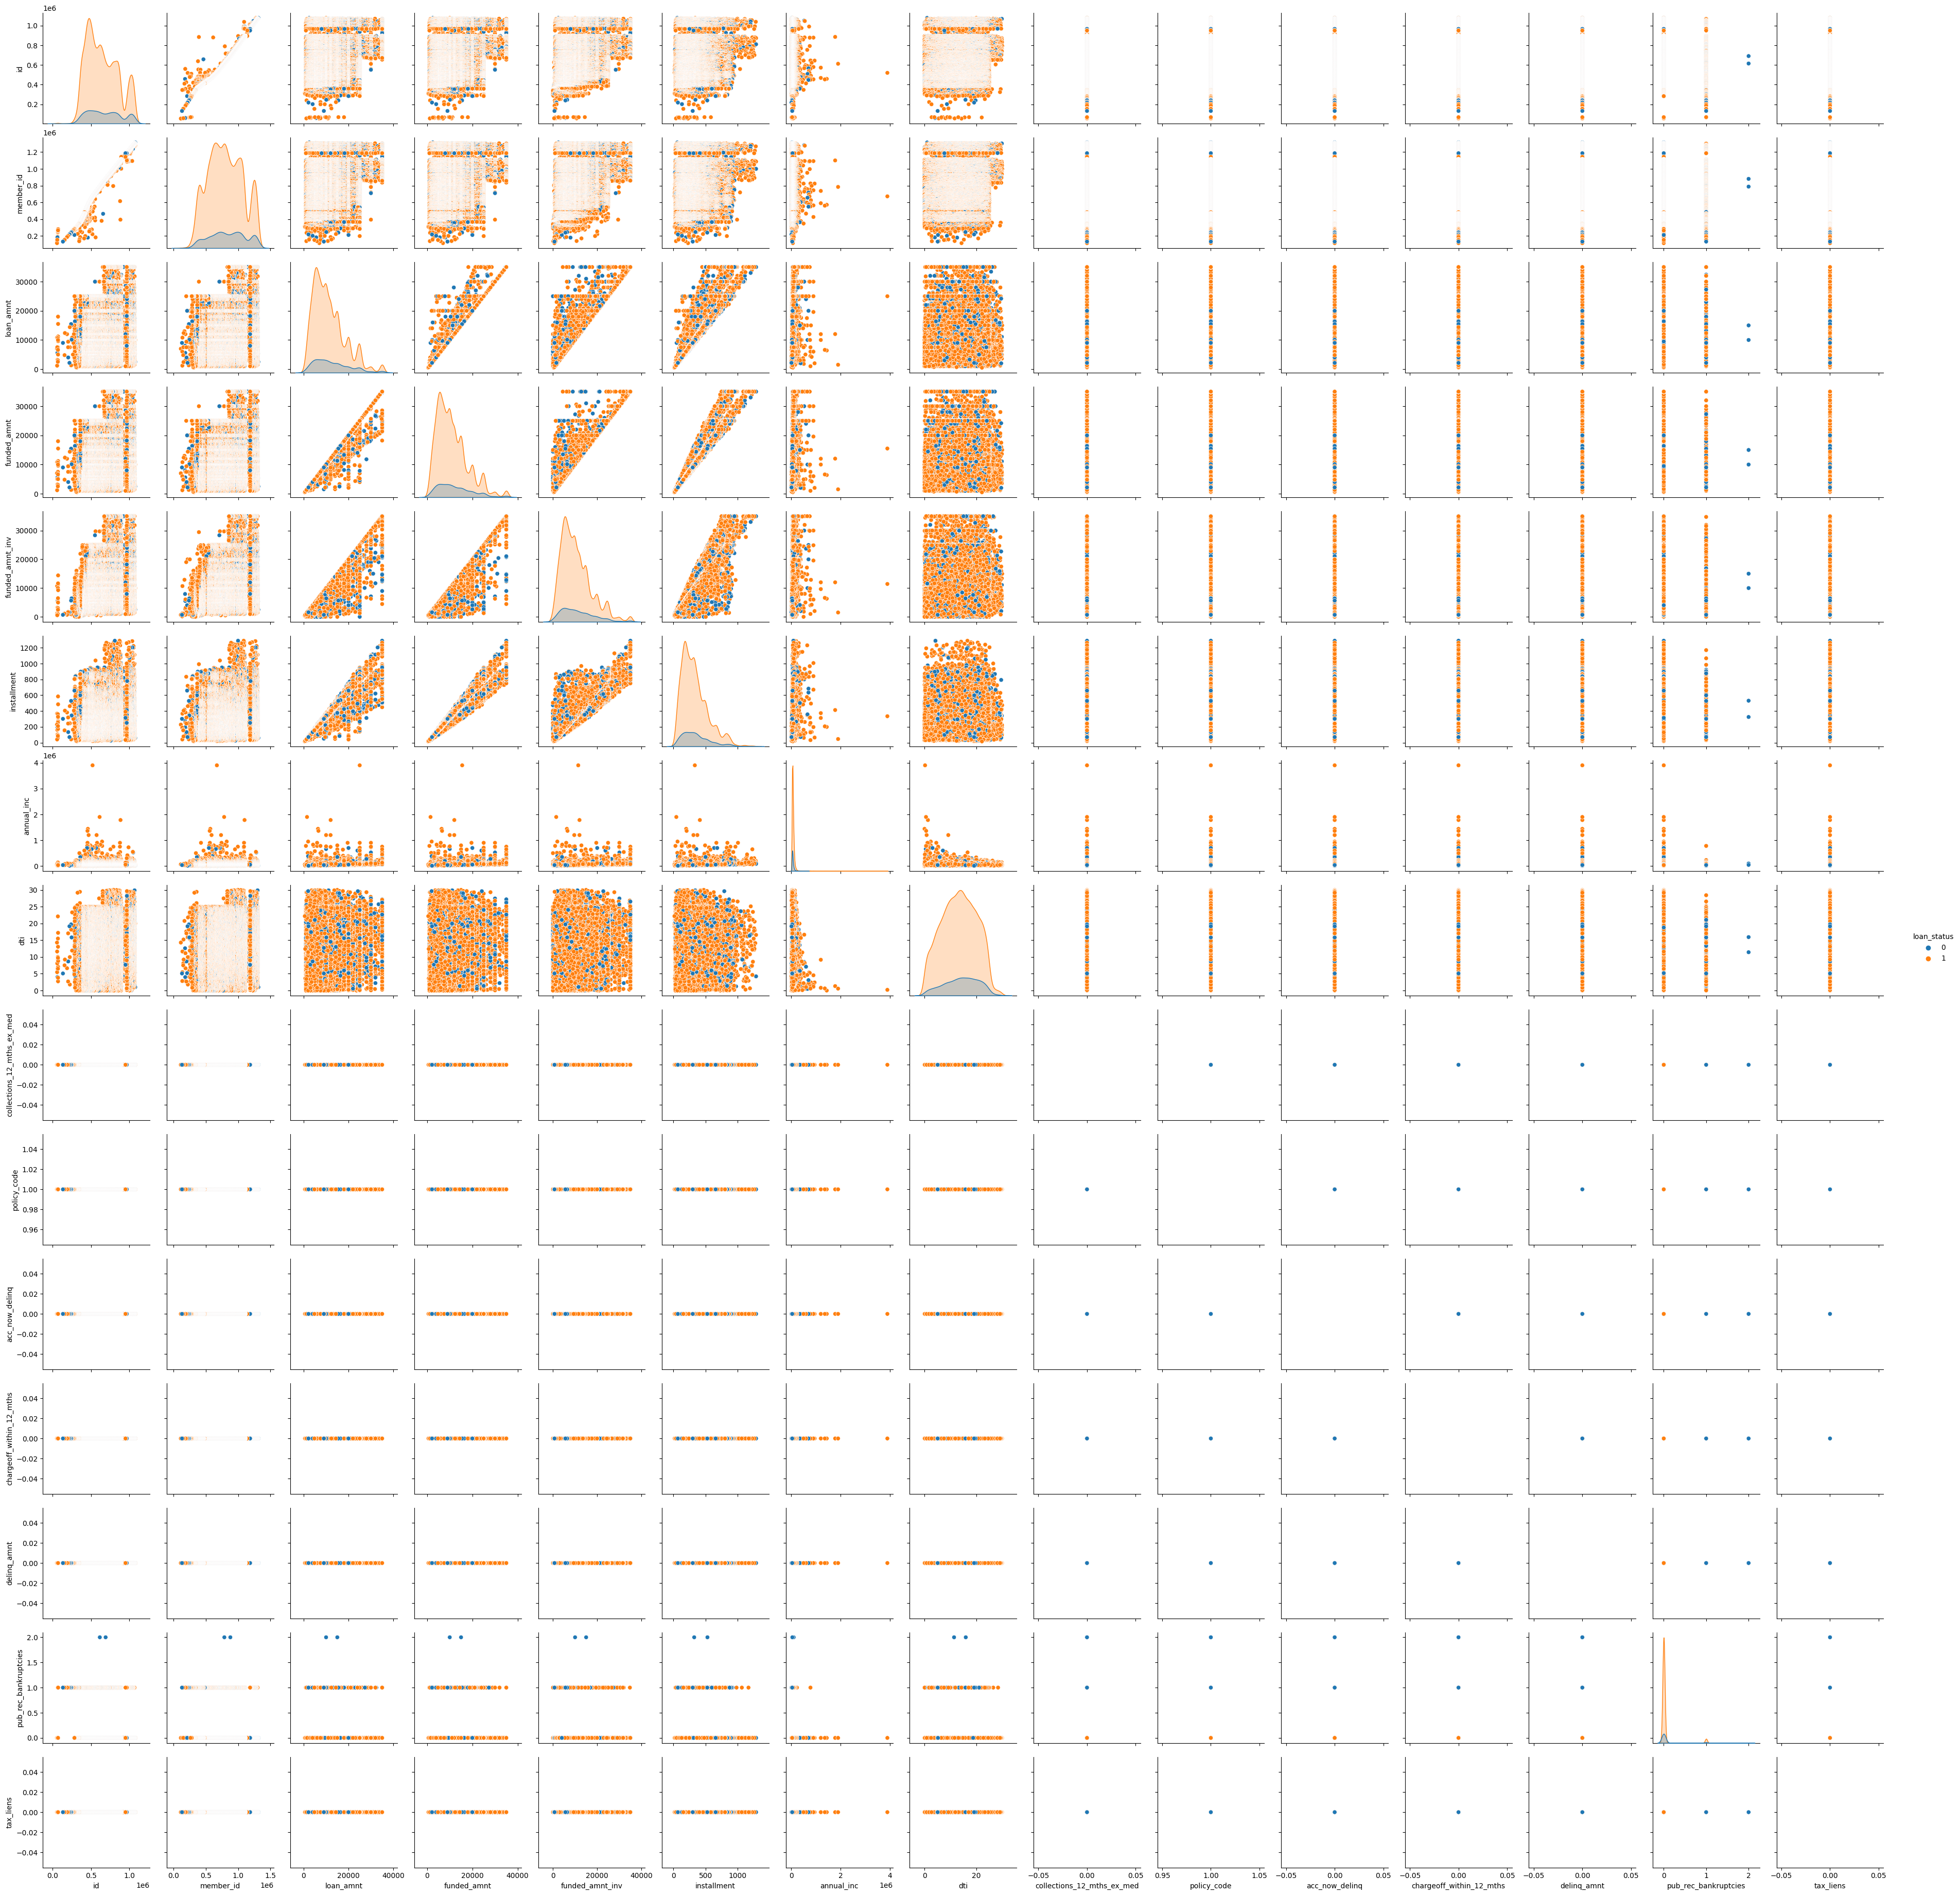

In [31]:
#Since reading the overall dataframe copmarison is difficult here hence I have broken it down into pieces below.
import seaborn
import matplotlib.pyplot as plt

# pairplot with hue sex
seaborn.pairplot(df, hue ='loan_status')
# to show
plt.show()

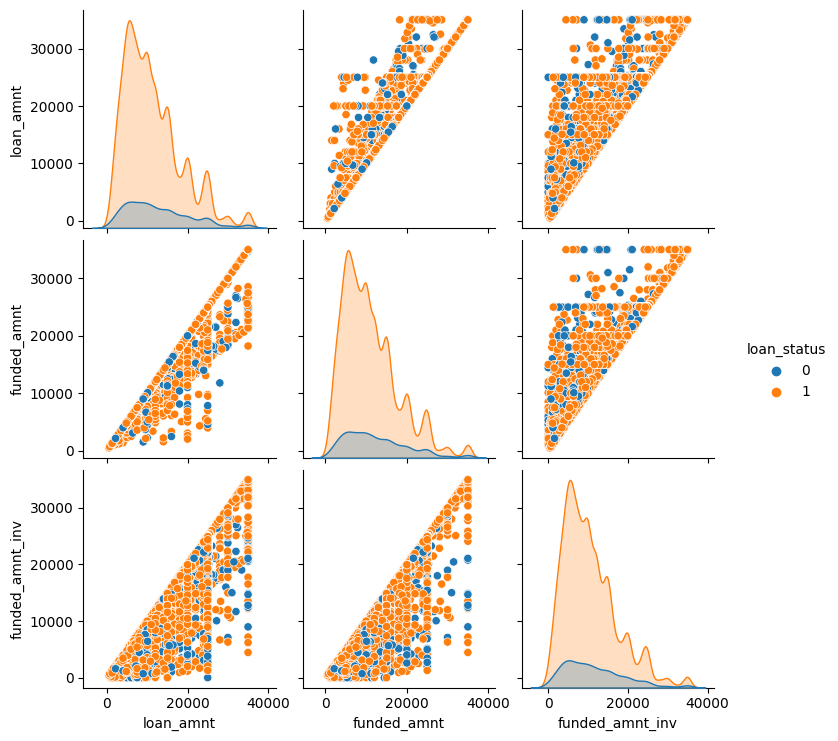

In [32]:
import seaborn
import matplotlib.pyplot as plt


#here 1 means fully paid and 0 means charged_off
df1 = df.filter(items =['loan_amnt','funded_amnt','funded_amnt_inv','loan_status'])
# df1
# pairplot with hue sex
seaborn.pairplot(df1, hue ='loan_status')
# to show
plt.show()

##### Insights

We don’t see any specific relation between loan_amt vs loan_status as the defaulters are split across the whole region.

We also don’t see any relation between funded_amt vs loan _status


No relation from funded amt_inv vs loan_status

Hence these columns will not help to take a decision whether to approve a loan for a borrower or not.




#### Recommendation

In [33]:

#Checking unique categories in grade column
df['grade'].unique()

array(['C', 'E', 'B', 'A', 'D', 'F', 'G'], dtype=object)

In [34]:

#Checking unique categories in sub-grade column
df['sub_grade'].unique()

array(['C4', 'C1', 'C5', 'E1', 'B5', 'C3', 'B1', 'A1', 'B3', 'B4', 'C2',
       'D2', 'A4', 'A5', 'B2', 'A3', 'E4', 'D3', 'F2', 'D4', 'F3', 'D1',
       'A2', 'E5', 'E3', 'F1', 'G4', 'E2', 'D5', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)